In [49]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
cancer_df = pd.read_csv('Cancer_Data.csv')

In [103]:
cancer_df.head()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,Symmetry,...,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W,B-M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Checking for null and missing values

In [136]:
cancer_df.isnull().sum().sum()

0

In [105]:
cancer_df.dtypes

ID                        int64
radius                  float64
texture                 float64
perimeter               float64
area                    float64
smoothness              float64
compactness             float64
concavity               float64
concave points          float64
Symmetry                float64
fractal dimension       float64
SE-radius               float64
texture-SE              float64
perimeter-SE            float64
area-SE                 float64
smoothness-SE           float64
compactness-SE          float64
concavity-SE            float64
concave points-SE       float64
Symmetry-SE             float64
fractal dimension-SE    float64
radius-W                float64
texture-W               float64
perimeter-W             float64
area-W                  float64
smoothness-W            float64
compactness-W           float64
concavity-W             float64
concave points-W        float64
Symmetry-W              float64
fractal dimension-W     float64
B-M     

## Exploratory Data Analysis

In [137]:
# Calculating Correlation
cancer_df.corr()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,Symmetry,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
Symmetry,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Plots for Correlation

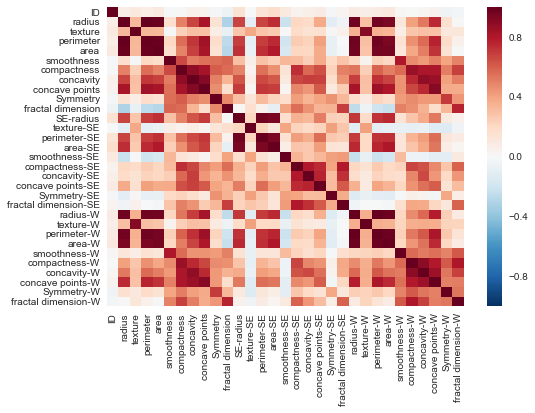

In [138]:
sns.heatmap(cancer_df.corr())
plt.show()

## Dummification for Categorical features

In [139]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in cancer_df.columns:
    if cancer_df[col].dtypes=='object':
        cancer_df[col] = le.fit_transform(cancer_df[col].astype(str))

In [140]:
cancer_df.head()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,Symmetry,...,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W,B-M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [141]:
numeric_df = cancer_df.select_dtypes(include=['float64','int64'])
numeric_df.head()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,Symmetry,...,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W,B-M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Plotting Histograms for comparison of each feature with the Target variable

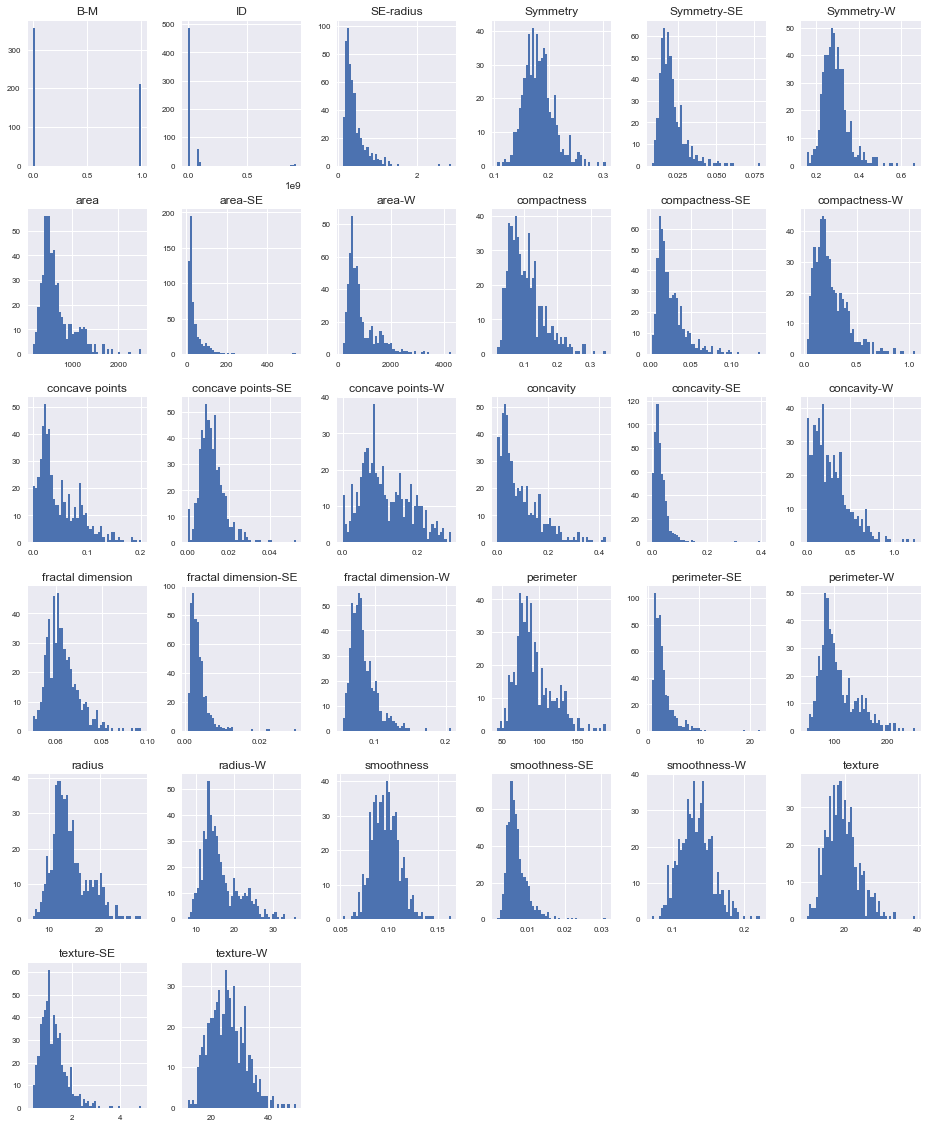

In [142]:
numeric_df.hist(figsize=(16,20), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

## Identifying features which are strongly correlated with the target variable

In [143]:
df_num_corr = numeric_df.corr()['B-M'][:-1] # -1 because the latest row is whether Malignant or not (M/B)
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with whether Cancer can occur or not (Target variable):\n{}".format(len(golden_features_list), golden_features_list))

There is 15 strongly correlated values with whether Cancer can occur or not (Target variable):
concave points-W    0.793566
perimeter-W         0.782914
concave points      0.776614
radius-W            0.776454
perimeter           0.742636
area-W              0.733825
radius              0.730029
area                0.708984
concavity           0.696360
concavity-W         0.659610
compactness         0.596534
compactness-W       0.590998
SE-radius           0.567134
perimeter-SE        0.556141
area-SE             0.548236
Name: B-M, dtype: float64


In [144]:
cancer_df.shape

(569, 32)

## Splitting the dataset into Train and Test datasets

In [145]:
X = cancer_df.iloc[:,1:31]
Y = cancer_df['B-M']

In [146]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=4)

## Logistic Regression Model

In [147]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

In [148]:
logit_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_prob = logit_model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)

In [150]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report:\n', classification_report(Y_test,y_pred))
print('Accuracy: ',accuracy_score(Y_test,y_pred))

Confusion Matrix:
 [[118  10]
 [  8  52]]
Classification report:
              precision    recall  f1-score   support

          0       0.94      0.92      0.93       128
          1       0.84      0.87      0.85        60

avg / total       0.91      0.90      0.90       188

Accuracy:  0.9042553191489362


In [151]:
from sklearn.metrics import roc_curve,auc

false_positive_rate,true_positive_rate,thresholds = roc_curve(Y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.8942708333333333

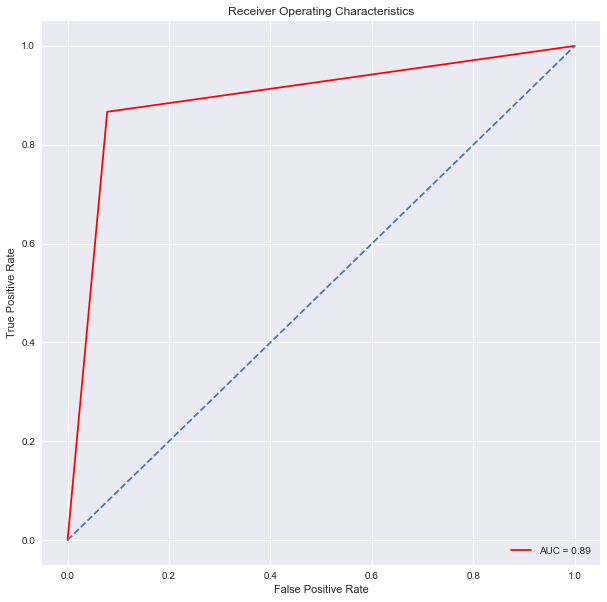

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate,true_positive_rate,color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## SVM Model

In [153]:
from sklearn import svm

clf = svm.LinearSVC()

In [154]:
clf.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [155]:
y_pred = clf.predict(X_test)

In [156]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report for SVM:\n', classification_report(Y_test,y_pred))
print('Accuracy: ',accuracy_score(Y_test,y_pred))

Confusion Matrix:
 [[104  24]
 [  5  55]]
Classification report for SVM:
              precision    recall  f1-score   support

          0       0.95      0.81      0.88       128
          1       0.70      0.92      0.79        60

avg / total       0.87      0.85      0.85       188

Accuracy:  0.8457446808510638


## Decision Tree model

In [157]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=2)

In [158]:
dtree_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
y_pred_dtree = dtree_model.predict(X_test)

In [160]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred_dtree)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report for SVM:\n', classification_report(Y_test,y_pred_dtree))
print('Accuracy: ',accuracy_score(Y_test,y_pred_dtree))

Confusion Matrix:
 [[112  16]
 [  1  59]]
Classification report for SVM:
              precision    recall  f1-score   support

          0       0.99      0.88      0.93       128
          1       0.79      0.98      0.87        60

avg / total       0.93      0.91      0.91       188

Accuracy:  0.9095744680851063


## Random Forest model

In [161]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

preds_rf = model_rf.predict(X_test)

print('\nClassification Report:\n',classification_report(Y_test,preds_rf))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,preds_rf))

print('\n Accuracy: ', accuracy_score(Y_test,preds_rf))


Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.94      0.95       128
          1       0.88      0.93      0.90        60

avg / total       0.94      0.94      0.94       188


Confusion Matrix:
 [[120   8]
 [  4  56]]

 Accuracy:  0.9361702127659575


## Applying PCA

In [163]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [164]:
print(pca.explained_variance_ratio_)

[9.84336058e-01 1.41142527e-02 1.31791703e-03 1.31895330e-04
 8.76834560e-05 6.45097300e-06 4.19110879e-06 9.26540826e-07
 3.47046830e-07 1.69326302e-07]


In [165]:
print(pca.singular_values_)

[1.25873863e+04 1.50727608e+03 4.60582994e+02 1.45706382e+02
 1.18801711e+02 3.22237794e+01 2.59733718e+01 1.22122629e+01
 7.47408281e+00 5.22066801e+00]


## Plots for PCA

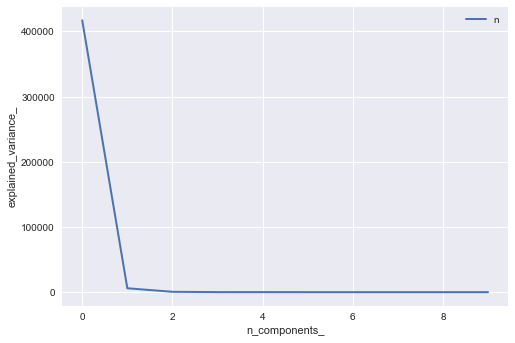

In [166]:
plt.plot(pca.explained_variance_,linewidth = 2)
plt.xlabel('n_components_')
plt.ylabel('explained_variance_')
plt.legend('n_components')
plt.show()

## Building the Classification models after applying PCA

## Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

logit_model_pca = LogisticRegression()

In [168]:
logit_model_pca.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
y_prob_pca = logit_model_pca.predict_proba(X_test)[:,1]
y_pred_pca = np.where(y_prob>0.5,1,0)

In [170]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred_pca)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report:\n', classification_report(Y_test,y_pred_pca))
print('Accuracy: ',accuracy_score(Y_test,y_pred_pca))

Confusion Matrix:
 [[118  10]
 [  8  52]]
Classification report:
              precision    recall  f1-score   support

          0       0.94      0.92      0.93       128
          1       0.84      0.87      0.85        60

avg / total       0.91      0.90      0.90       188

Accuracy:  0.9042553191489362


In [171]:
from sklearn.metrics import roc_curve,auc

false_positive_rate,true_positive_rate,thresholds = roc_curve(Y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.8645833333333333

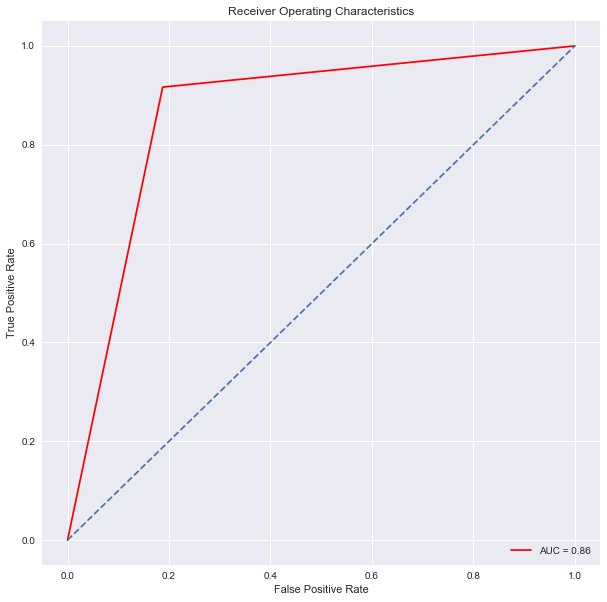

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate,true_positive_rate,color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## SVM model

In [173]:
from sklearn import svm

clf_pca = svm.LinearSVC()

In [174]:
clf_pca.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [175]:
y_pred_svm_pca = clf_pca.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred_svm_pca)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report for SVM:\n', classification_report(Y_test,y_pred_svm_pca))
print('Accuracy: ',accuracy_score(Y_test,y_pred_svm_pca))

Confusion Matrix:
 [[125   3]
 [ 10  50]]
Classification report for SVM:
              precision    recall  f1-score   support

          0       0.93      0.98      0.95       128
          1       0.94      0.83      0.88        60

avg / total       0.93      0.93      0.93       188

Accuracy:  0.9308510638297872


## Decision Tree model

In [177]:
from sklearn.tree import DecisionTreeClassifier

dtree_model_pca = DecisionTreeClassifier(max_depth=2)

In [178]:
dtree_model_pca.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [179]:
y_pred_dtree_pca = dtree_model_pca.predict(X_test)

In [180]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix = confusion_matrix(Y_test,y_pred_dtree_pca)
print('Confusion Matrix:\n',confusion_matrix)
print('Classification report for SVM:\n', classification_report(Y_test,y_pred_dtree_pca))
print('Accuracy: ',accuracy_score(Y_test,y_pred_dtree_pca))

Confusion Matrix:
 [[117  11]
 [ 13  47]]
Classification report for SVM:
              precision    recall  f1-score   support

          0       0.90      0.91      0.91       128
          1       0.81      0.78      0.80        60

avg / total       0.87      0.87      0.87       188

Accuracy:  0.8723404255319149


## Random Forest model

In [181]:
from sklearn.ensemble import RandomForestClassifier

model_rf_pca = RandomForestClassifier()
model_rf_pca.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

preds_rf_pca = model_rf_pca.predict(X_test)

print('\nClassification Report:\n',classification_report(Y_test,preds_rf_pca))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,preds_rf_pca))

print('\n Accuracy: ', accuracy_score(Y_test,preds_rf_pca))


Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.92      0.93       128
          1       0.84      0.87      0.85        60

avg / total       0.91      0.90      0.90       188


Confusion Matrix:
 [[118  10]
 [  8  52]]

 Accuracy:  0.9042553191489362
